In [139]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
import numpy as np
import random
from sklearn import ensemble
import OpenBlender
from sklearn.model_selection import train_test_split

%matplotlib inline

In [137]:
df_seattle = pd.read_csv("kc_house_data.csv")
print(df_seattle.shape)
df_seattle.head()

(21613, 21)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


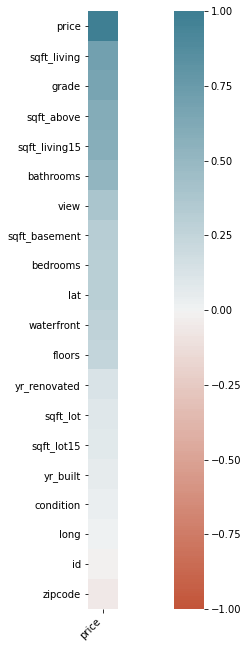

In [140]:
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)
plt.rcParams['figure.figsize'] = [20, 11]

corr = df_seattle.corr()[['price']].sort_values('price', ascending = False)
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [81]:
class StandardModel:
    
    model = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
    
    def getPredictionScore(self, df, target):       
        # Drop non numerics
        df = df.dropna(axis=1).select_dtypes(['number'])   
        
        # Create train/test sets
        X = df.loc[:, df.columns != target].values
        y = df.loc[:,[target]].values        
        X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10, random_state =2)
        
        print('Train Shapes:')
        print(X_train.shape)
        print(y_train.shape)
        
        # Train on data
        self.model.fit(X_train, y_train.ravel())
        
        print('Test Shapes:')
        print(X_test.shape)
        print(y_test.shape)
        
        # Return prediction score
        return self.model.score(X_test, y_test)

In [77]:
df_anchor = df_seattle.drop(['id', 'lat', 'long', 'zipcode'], axis=1)
df_anchor.shape

(21613, 17)

In [74]:
our_model = StandardModel()
score = our_model.getPredictionScore(df_anchor, 'price')

Train Shape:
(19451, 15)
(19451, 1)
Test Shape:
(2162, 15)
(2162, 1)
0.7938076297621


In [88]:

results_list = []

for iteration in range(0, 30):
    cols = list(df_anchor.dropna(axis=1).select_dtypes(['number'])  .columns)
    cols_sel = ['price']

    previous_score = 0.05

    while len(cols_sel) < len(cols):
        main_list = list(np.setdiff1d(cols, cols_sel))
        new_var = random.choice(main_list)
        cols_sel.append(new_var)
        print(len(cols_sel))
        print(cols_sel)
        our_model = StandardModel()
        score = our_model.getPredictionScore(df_anchor[cols_sel], 'price')
        improvement = (score - previous_score) / previous_score
        previous_score = score
        results_list.append({'iteration' : iteration, 'num_vars' : len(cols_sel) - 1, 'score' : score, 'improve_percent' : improvement, 'new_var' : new_var})
        print(new_var)
        print('---')
    pd.DataFrame(results_list).to_csv('scores_without_external.csv')

2
['price', 'sqft_lot15']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
sqft_lot15
---
3
['price', 'sqft_lot15', 'sqft_living15']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
sqft_living15
---
4
['price', 'sqft_lot15', 'sqft_living15', 'floors']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
floors
---
5
['price', 'sqft_lot15', 'sqft_living15', 'floors', 'grade']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
grade
---
6
['price', 'sqft_lot15', 'sqft_living15', 'floors', 'grade', 'bathrooms']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
bathrooms
---
7
['price', 'sqft_lot15', 'sqft_living15', 'floors', 'grade', 'bathrooms', 'yr_built']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
yr_built
---
8
['price', 'sqft_lot15', 'sqft_living15', 'floors', 'grade', 'bathrooms', 'yr_built', 'bedrooms']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(

Test Shapes:
(2162, 13)
(2162, 1)
floors
---
15
['price', 'sqft_lot15', 'sqft_lot', 'condition', 'bathrooms', 'sqft_living15', 'sqft_basement', 'yr_built', 'waterfront', 'view', 'bedrooms', 'sqft_above', 'yr_renovated', 'floors', 'sqft_living']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
sqft_living
---
16
['price', 'sqft_lot15', 'sqft_lot', 'condition', 'bathrooms', 'sqft_living15', 'sqft_basement', 'yr_built', 'waterfront', 'view', 'bedrooms', 'sqft_above', 'yr_renovated', 'floors', 'sqft_living', 'grade']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
grade
---
2
['price', 'condition']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
condition
---
3
['price', 'condition', 'waterfront']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
waterfront
---
4
['price', 'condition', 'waterfront', 'grade']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
grade
---
5
['price', 'conditi

Test Shapes:
(2162, 10)
(2162, 1)
floors
---
12
['price', 'yr_renovated', 'sqft_above', 'yr_built', 'grade', 'sqft_basement', 'bedrooms', 'sqft_lot15', 'view', 'bathrooms', 'floors', 'sqft_lot']
Train Shapes:
(19451, 11)
(19451, 1)
Test Shapes:
(2162, 11)
(2162, 1)
sqft_lot
---
13
['price', 'yr_renovated', 'sqft_above', 'yr_built', 'grade', 'sqft_basement', 'bedrooms', 'sqft_lot15', 'view', 'bathrooms', 'floors', 'sqft_lot', 'sqft_living']
Train Shapes:
(19451, 12)
(19451, 1)
Test Shapes:
(2162, 12)
(2162, 1)
sqft_living
---
14
['price', 'yr_renovated', 'sqft_above', 'yr_built', 'grade', 'sqft_basement', 'bedrooms', 'sqft_lot15', 'view', 'bathrooms', 'floors', 'sqft_lot', 'sqft_living', 'condition']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:
(2162, 13)
(2162, 1)
condition
---
15
['price', 'yr_renovated', 'sqft_above', 'yr_built', 'grade', 'sqft_basement', 'bedrooms', 'sqft_lot15', 'view', 'bathrooms', 'floors', 'sqft_lot', 'sqft_living', 'condition', 'sqft_living15']
Train Shape

Test Shapes:
(2162, 7)
(2162, 1)
condition
---
9
['price', 'sqft_above', 'yr_renovated', 'sqft_lot', 'bedrooms', 'grade', 'yr_built', 'condition', 'sqft_living']
Train Shapes:
(19451, 8)
(19451, 1)
Test Shapes:
(2162, 8)
(2162, 1)
sqft_living
---
10
['price', 'sqft_above', 'yr_renovated', 'sqft_lot', 'bedrooms', 'grade', 'yr_built', 'condition', 'sqft_living', 'floors']
Train Shapes:
(19451, 9)
(19451, 1)
Test Shapes:
(2162, 9)
(2162, 1)
floors
---
11
['price', 'sqft_above', 'yr_renovated', 'sqft_lot', 'bedrooms', 'grade', 'yr_built', 'condition', 'sqft_living', 'floors', 'view']
Train Shapes:
(19451, 10)
(19451, 1)
Test Shapes:
(2162, 10)
(2162, 1)
view
---
12
['price', 'sqft_above', 'yr_renovated', 'sqft_lot', 'bedrooms', 'grade', 'yr_built', 'condition', 'sqft_living', 'floors', 'view', 'sqft_living15']
Train Shapes:
(19451, 11)
(19451, 1)
Test Shapes:
(2162, 11)
(2162, 1)
sqft_living15
---
13
['price', 'sqft_above', 'yr_renovated', 'sqft_lot', 'bedrooms', 'grade', 'yr_built', 'cond

Test Shapes:
(2162, 3)
(2162, 1)
sqft_basement
---
5
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
grade
---
6
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade', 'sqft_lot']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
sqft_lot
---
7
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade', 'sqft_lot', 'waterfront']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
waterfront
---
8
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade', 'sqft_lot', 'waterfront', 'yr_renovated']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
yr_renovated
---
9
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade', 'sqft_lot', 'waterfront', 'yr_renovated', 'condition']
Train Shapes:
(19451, 8)
(19451, 1)
Test Shapes:
(2162, 8)
(2162, 1)
condition
---
10
['price', 'yr_built', 'sqft_living', 'sqft_basement', 'grade', 'sqft_lot

Test Shapes:
(2162, 14)
(2162, 1)
bathrooms
---
16
['price', 'sqft_lot', 'sqft_above', 'grade', 'sqft_living', 'sqft_basement', 'sqft_living15', 'sqft_lot15', 'waterfront', 'bedrooms', 'floors', 'yr_built', 'yr_renovated', 'condition', 'bathrooms', 'view']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
view
---
2
['price', 'yr_renovated']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
yr_renovated
---
3
['price', 'yr_renovated', 'sqft_above']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
sqft_above
---
4
['price', 'yr_renovated', 'sqft_above', 'view']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
view
---
5
['price', 'yr_renovated', 'sqft_above', 'view', 'sqft_lot']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
sqft_lot
---
6
['price', 'yr_renovated', 'sqft_above', 'view', 'sqft_lot', 'bathrooms']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
bathroo

Test Shapes:
(2162, 11)
(2162, 1)
sqft_lot
---
13
['price', 'waterfront', 'grade', 'sqft_living15', 'yr_renovated', 'floors', 'sqft_basement', 'bedrooms', 'sqft_above', 'condition', 'sqft_living', 'sqft_lot', 'yr_built']
Train Shapes:
(19451, 12)
(19451, 1)
Test Shapes:
(2162, 12)
(2162, 1)
yr_built
---
14
['price', 'waterfront', 'grade', 'sqft_living15', 'yr_renovated', 'floors', 'sqft_basement', 'bedrooms', 'sqft_above', 'condition', 'sqft_living', 'sqft_lot', 'yr_built', 'view']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:
(2162, 13)
(2162, 1)
view
---
15
['price', 'waterfront', 'grade', 'sqft_living15', 'yr_renovated', 'floors', 'sqft_basement', 'bedrooms', 'sqft_above', 'condition', 'sqft_living', 'sqft_lot', 'yr_built', 'view', 'bathrooms']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
bathrooms
---
16
['price', 'waterfront', 'grade', 'sqft_living15', 'yr_renovated', 'floors', 'sqft_basement', 'bedrooms', 'sqft_above', 'condition', 'sqft_living', 'sq

Test Shapes:
(2162, 8)
(2162, 1)
sqft_living
---
10
['price', 'sqft_basement', 'bathrooms', 'yr_built', 'view', 'bedrooms', 'floors', 'yr_renovated', 'sqft_living', 'sqft_lot']
Train Shapes:
(19451, 9)
(19451, 1)
Test Shapes:
(2162, 9)
(2162, 1)
sqft_lot
---
11
['price', 'sqft_basement', 'bathrooms', 'yr_built', 'view', 'bedrooms', 'floors', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above']
Train Shapes:
(19451, 10)
(19451, 1)
Test Shapes:
(2162, 10)
(2162, 1)
sqft_above
---
12
['price', 'sqft_basement', 'bathrooms', 'yr_built', 'view', 'bedrooms', 'floors', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'waterfront']
Train Shapes:
(19451, 11)
(19451, 1)
Test Shapes:
(2162, 11)
(2162, 1)
waterfront
---
13
['price', 'sqft_basement', 'bathrooms', 'yr_built', 'view', 'bedrooms', 'floors', 'yr_renovated', 'sqft_living', 'sqft_lot', 'sqft_above', 'waterfront', 'sqft_living15']
Train Shapes:
(19451, 12)
(19451, 1)
Test Shapes:
(2162, 12)
(2162, 1)
sqft_living15
---
14
['pric

Test Shapes:
(2162, 3)
(2162, 1)
grade
---
5
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
condition
---
6
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition', 'bedrooms']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
bedrooms
---
7
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition', 'bedrooms', 'sqft_above']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
sqft_above
---
8
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition', 'bedrooms', 'sqft_above', 'sqft_living15']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
sqft_living15
---
9
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition', 'bedrooms', 'sqft_above', 'sqft_living15', 'sqft_basement']
Train Shapes:
(19451, 8)
(19451, 1)
Test Shapes:
(2162, 8)
(2162, 1)
sqft_basement
---
10
['price', 'bathrooms', 'yr_renovated', 'grade', 'condition', 'bedrooms', 's

Test Shapes:
(2162, 14)
(2162, 1)
view
---
16
['price', 'sqft_living15', 'grade', 'yr_built', 'sqft_above', 'bedrooms', 'waterfront', 'sqft_basement', 'sqft_lot15', 'sqft_lot', 'bathrooms', 'sqft_living', 'condition', 'floors', 'view', 'yr_renovated']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
yr_renovated
---
2
['price', 'waterfront']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
waterfront
---
3
['price', 'waterfront', 'bedrooms']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
bedrooms
---
4
['price', 'waterfront', 'bedrooms', 'view']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
view
---
5
['price', 'waterfront', 'bedrooms', 'view', 'sqft_living15']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
sqft_living15
---
6
['price', 'waterfront', 'bedrooms', 'view', 'sqft_living15', 'floors']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
floors
---
7
[

Test Shapes:
(2162, 12)
(2162, 1)
yr_built
---
14
['price', 'bathrooms', 'sqft_lot15', 'sqft_lot', 'bedrooms', 'sqft_above', 'grade', 'floors', 'sqft_living', 'sqft_basement', 'waterfront', 'condition', 'yr_built', 'sqft_living15']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:
(2162, 13)
(2162, 1)
sqft_living15
---
15
['price', 'bathrooms', 'sqft_lot15', 'sqft_lot', 'bedrooms', 'sqft_above', 'grade', 'floors', 'sqft_living', 'sqft_basement', 'waterfront', 'condition', 'yr_built', 'sqft_living15', 'yr_renovated']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
yr_renovated
---
16
['price', 'bathrooms', 'sqft_lot15', 'sqft_lot', 'bedrooms', 'sqft_above', 'grade', 'floors', 'sqft_living', 'sqft_basement', 'waterfront', 'condition', 'yr_built', 'sqft_living15', 'yr_renovated', 'view']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
view
---
2
['price', 'sqft_basement']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
sqf

In [95]:
res_df = pd.DataFrame(results_list)
res_df.groupby('new_var').mean()[['improve_percent']].sort_values('improve_percent', ascending = False) #[['num_vars', 'new_var', 'score', 'improve_percent']]

,improve_percent
new_var,
sqft_above,3.185085
sqft_living15,1.776161
grade,1.694359
sqft_living,1.684908
bathrooms,0.735857
sqft_basement,0.557646
waterfront,0.507292
floors,0.471860
view,0.265945


In [126]:
pd.set_option("display.max_rows", 1000, "display.max_columns", 1000)
plt.rcParams['figure.figsize'] = [20, 11]

def plotScoreImprovement(df_1, df_2, var_x, var_y, title):
    fig, ax = plt.subplots()
    fig.figsize = [15, 5]
    ax.set_ylim([0.5, 0.95])
    color_1 = 'steelblue'
    color_2 = 'salmon'
    
    a1 = ax.plot(df_1[var_x], df_1[var_y], label = 'WITH external data', color = color_1)
    plt.axhline(y = df_1[var_y].max(), color = color_1, linestyle='--')
    if df_2 is not None:
        a2 = ax.plot(df_2[var_x], df_2[var_y], label = 'WITHOUT external data', color = color_2)
        plt.axhline(y = df_2[var_y].max(), color = color_2, linestyle='--')
    
    ax.legend(loc = 'upper left')
    ax.set_title(title , fontsize = 24)
    
    plt.xlabel('Number of Features', fontsize=18)
    plt.ylabel('SCORE', fontsize=18)
    
    plt.show()

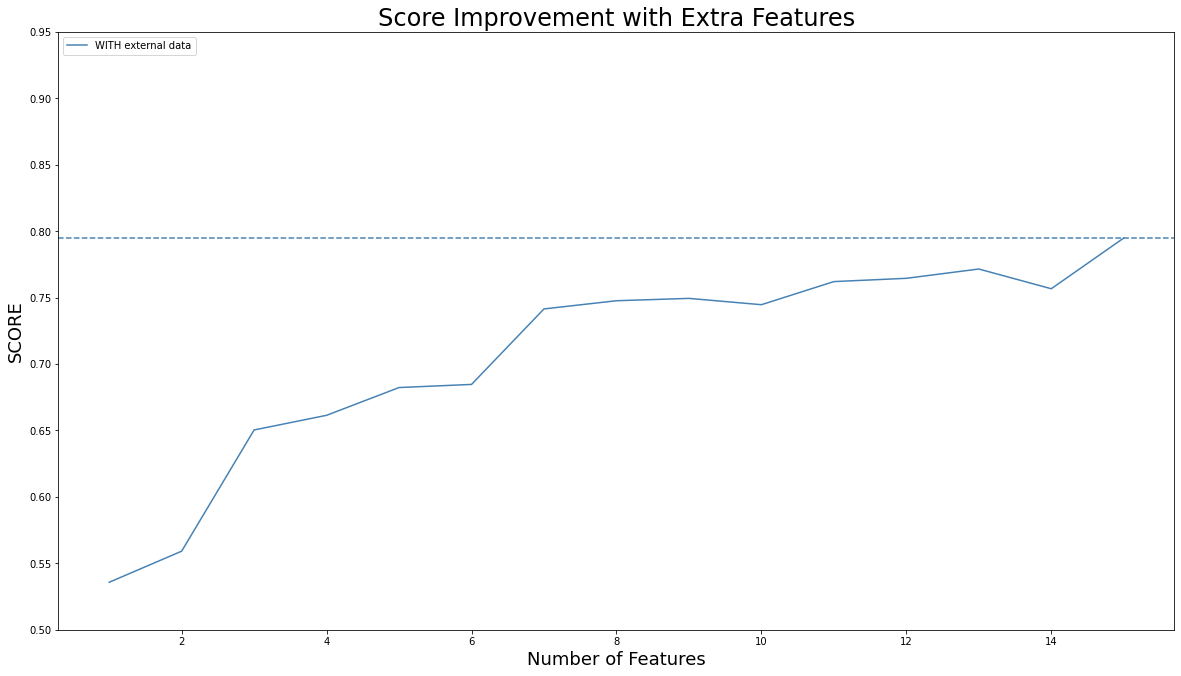

In [135]:
plotScoreImprovement(res_df[res_df.iteration == 1], None, 'num_vars', 'score', 'Score Improvement with Extra Features')

In [98]:
df_seattle

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


## Get External Data

In [99]:
token = 'YOUR_TOKEN_HERE' # Get it in https://www.openblender.io

# Blend source for dataset 'Picnic Tables in Seattle'
blend_source = {
    "id_dataset": "5ff4c4e9951629568a45d0f0"
}

df_blend = OpenBlender.locationBlend(token = token
                                     blend_source = blend_source,
                                     anchor_lat = df_seattle.lat,
                                     anchor_lon = df_seattle.long,
                                     blend_type = 'in_radio_agg',
                                     agg_output = 'count',
                                     r = 1)

df_anchor = pd.concat([df_anchor, df_blend], axis = 1)

Task ID: ''.
Total estimated consumption: 864520.0 processing units.
Task confirmed. Starting download..
2.0%
5.0%
7.000000000000001%
9.0%
12.0%
14.000000000000002%
16.0%
19.0%
21.0%
23.0%
25.0%
28.000000000000004%
30.0%
32.0%
35.0%
37.0%
39.0%
42.0%
44.0%
46.0%
49.0%
51.0%
53.0%
56.00000000000001%
57.99999999999999%
60.0%
62.0%
65.0%
67.0%
69.0%
72.0%
74.0%
76.0%
79.0%
81.0%
83.0%
86.0%
88.0%
90.0%
93.0%
95.0%
97.0%
99.0%
100%


In [104]:
df_seattle

,PICNIC_TAB._COUNT_IN_RADIO_1km,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,PICNIC_TAB._COUNT_IN_RADIO_1km
0,262,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,262
1,587,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,587
2,214,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,214
3,375,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,375
4,0,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,700,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,700
21609,448,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,448
21610,858,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,858
21611,0,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,0


In [106]:
blend_sources = [{'id_dataset' : '5ff4b7f095162956893e4463', # Green Spaces from Parks Dataset
                'feature' : 'name',
                'dataset_filter' : [{'feature_desc' : 'Green Space'}]}, 
                {
                    'id_dataset' : '5ff4c4e9951629568a45d0f0', # Picnic Tables
                },
                {
                    "id_dataset": "5ff4c70695162956893e4e58", # Football Fields
                },
                {
                    "id_dataset": "5ff4c47b95162956893e4b74", # Basketball Courts
                },
                {
                    "id_dataset": "5ff4c3a2951629568a45d03b", # Play Areas
                },
                {
                    "id_dataset": "5ff4c2ad95162956893e4b35", # Picnic Sites
                },
                {
                    "id_dataset": "5ff4c213951629568a45d008", # Wading Pools
                },
                {
                    "id_dataset": "5ff4be07951629568a45ce15", # Swimming Beaches
                },
                {
                    "id_dataset": "5ff4c0f1951629568a45cefe", # Public Restrooms
                },
                {
                    "id_dataset": "5ff4bad095162956893e4942", # Golf Courses
                },
                {
                    "id_dataset": "5ff4b995951629568a45c5a2", # Water Fountains
                },
                {
                    "id_dataset": "5ff4af6f951629568a457003", # Cultural Spaces
                },
                {
                    "id_dataset": "5ff4b134951629568a4578b8", # Public Art
                },
                {
                    "id_dataset": "5ff4b7f095162956893e4463", # Parks With Features
                }
]

In [ ]:
for radio in [0.2, 1]:
    for blend_source in blend_sources:
        df_blend = OpenBlender.locationBlend(token = token,
                                             blend_source = blend_source,
                                              anchor_lat = df_anchor.lat,
                                              anchor_lon = df_anchor.long,
                                              blend_type = 'in_radio_agg', 
                                              agg_output = 'count',
                                              r = radio)
        df_anchor = pd.concat([df_anchor, df_blend], axis = 1)
        df_anchor.to_csv('df_anchor.csv')

In [6]:
class StandardModel:
    
    model = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth = 5, min_samples_split = 2,
          learning_rate = 0.1, loss = 'ls')
    
    def getMetrics(self, df, target):
        
        # Function to get the error sum from the trained model        
        # Drop non numerics
        df = df.dropna(axis=1).select_dtypes(['number'])   
        df = df.drop(['id'], axis=1)
        
        # Create train/test sets
        X = df.loc[:, df.columns != target].values
        y = df.loc[:,[target]].values        
        X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.10,random_state =2)
        
        print('Train Shape:')
        print(X_train.shape)
        print(y_train.shape)
        
        # Train on data
        self.model.fit(X_train, y_train.ravel())
        
        print('Test Shape:')
        print(X_test.shape)
        print(y_test.shape)
        score = self.model.score(X_test, y_test)
        print(score)
        return score

In [107]:
df_anchor = pd.read_csv("df_anchor.csv")
print(df_anchor.shape)
df_anchor.head()

(21613, 107)


,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price_sqft,latitude,PARKS_WITH.name_COUNT_IN_RADIO_0.3km,longitude,latitude.1,longitude.1,PARKS_WITH.name_COUNT_IN_RADIO_1km,latitude.2,PICNIC_TAB._COUNT_IN_RADIO_0.3km,longitude.2,latitude.3,PICNIC_TAB._COUNT_IN_RADIO_1km,longitude.3,latitude.4,FOOTBALL_F._COUNT_IN_RADIO_0.3km,longitude.4,latitude.5,FOOTBALL_F._COUNT_IN_RADIO_1km,longitude.5,latitude.6,BASKETBALL._COUNT_IN_RADIO_0.3km,longitude.6,latitude.7,longitude.7,BASKETBALL._COUNT_IN_RADIO_1km,latitude.8,PLAY_AREAS._COUNT_IN_RADIO_0.3km,longitude.8,latitude.9,longitude.9,PLAY_AREAS._COUNT_IN_RADIO_1km,latitude.10,longitude.10,PICNIC_SIT._COUNT_IN_RADIO_0.3km,latitude.11,PICNIC_SIT._COUNT_IN_RADIO_1km,longitude.11,latitude.12,longitude.12,WADING_POO._COUNT_IN_RADIO_0.3km,latitude.13,WADING_POO._COUNT_IN_RADIO_1km,longitude.13,latitude.14,SWIMMING_B._COUNT_IN_RADIO_0.3km,longitude.14,latitude.15,SWIMMING_B._COUNT_IN_RADIO_1km,longitude.15,latitude.16,PUBLIC_RES._COUNT_IN_RADIO_0.3km,longitude.16,latitude.17,PUBLIC_RES._COUNT_IN_RADIO_1km,longitude.17,latitude.18,longitude.18,GOLF_COURS._COUNT_IN_RADIO_0.3km,latitude.19,GOLF_COURS._COUNT_IN_RADIO_1km,longitude.19,latitude.20,WATER_FOUN._COUNT_IN_RADIO_0.3km,longitude.20,latitude.21,WATER_FOUN._COUNT_IN_RADIO_1km,longitude.21,latitude.22,CULTURAL_S._COUNT_IN_RADIO_0.3km,longitude.22,latitude.23,CULTURAL_S._COUNT_IN_RADIO_1km,longitude.23,latitude.24,PUBLIC_ART._COUNT_IN_RADIO_0.3km,longitude.24,latitude.25,PUBLIC_ART._COUNT_IN_RADIO_1km,longitude.25,latitude.26,PARKS_WITH._COUNT_IN_RADIO_0.3km,longitude.26,latitude.27,PARKS_WITH._COUNT_IN_RADIO_1km,longitude.27
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,188.050847,47.5112,2,-122.257,47.5112,-122.257,8,47.5112,15,-122.257,47.5112,262,-122.257,47.5112,1,-122.257,47.5112,6,-122.257,47.5112,3,-122.257,47.5112,-122.257,18,47.5112,5,-122.257,47.5112,-122.257,41,47.5112,-122.257,2,47.5112,11,-122.257,47.5112,-122.257,0,47.5112,5,-122.257,47.5112,1,-122.257,47.5112,3,-122.257,47.5112,5,-122.257,47.5112,35,-122.257,47.5112,-122.257,0,47.5112,1,-122.257,47.5112,10,-122.257,47.5112,56,-122.257,47.5112,12,-122.257,47.5112,179,-122.257,47.5112,6,-122.257,47.5112,49,-122.257,47.5112,38,-122.257,47.5112,263,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,209.338521,47.7210,1,-122.319,47.7210,-122.319,8,47.7210,58,-122.319,47.7210,587,-122.319,47.7210,3,-122.319,47.7210,9,-122.319,47.7210,2,-122.319,47.7210,-122.319,19,47.7210,14,-122.319,47.7210,-122.319,66,47.7210,-122.319,1,47.7210,9,-122.319,47.7210,-122.319,1,47.7210,12,-122.319,47.7210,0,-122.319,47.7210,5,-122.319,47.7210,6,-122.319,47.7210,51,-122.319,47.7210,-122.319,1,47.7210,3,-122.319,47.7210,14,-122.319,47.7210,89,-122.319,47.7210,35,-122.319,47.7210,343,-122.319,47.7210,25,-122.319,47.7210,106,-122.319,47.7210,54,-122.319,47.7210,407,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,233.766234,47.7379,0,-122.233,47.7379,-122.233,4,47.7379,0,-122.233,47.7379,214,-122.233,47.7379,0,-122.233,47.7379,4,-122.233,47.7379,0,-122.233,47.7379,-122.233,10,47.7379,0,-122.233,47.7379,-122.233,27,47.7379,-122.233,0,47.7379,4,-122.233,47.7379,-122.233,0,47.7379,6,-122.233,47.7379,0,-122.233,47.7379,3,-122.233,47.7379,0,-122.233,47.7379,19,-122.233,47.7379,-122.233,0,47.7379,1,-122.233,47.7379,0,-122.233,47.7379,33,-122.233,47.7379,8,-122.233,47.7379,151,-122.233,47.7379,0,-122.233,47.7379,43,-122.233,47.7379,0,-122.233,47.7379,166,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,308.163265,47.5208,5,-122.393,47.5208,-122.393,8,47.5208,152,-122.393,

In [114]:
df_anchor2 = df_anchor.drop(['lat','long', 'zipcode', 'price_sqft'], 1)
for col in df_anchor2.columns:
    if 'latitude' in col or 'longitude' in col:
        df_anchor2 = df_anchor2.drop([col], 1)
df_anchor2

df_seattle

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,PARKS_WITH.name_COUNT_IN_RADIO_0.3km,PARKS_WITH.name_COUNT_IN_RADIO_1km,PICNIC_TAB._COUNT_IN_RADIO_0.3km,PICNIC_TAB._COUNT_IN_RADIO_1km,FOOTBALL_F._COUNT_IN_RADIO_0.3km,FOOTBALL_F._COUNT_IN_RADIO_1km,BASKETBALL._COUNT_IN_RADIO_0.3km,BASKETBALL._COUNT_IN_RADIO_1km,PLAY_AREAS._COUNT_IN_RADIO_0.3km,PLAY_AREAS._COUNT_IN_RADIO_1km,PICNIC_SIT._COUNT_IN_RADIO_0.3km,PICNIC_SIT._COUNT_IN_RADIO_1km,WADING_POO._COUNT_IN_RADIO_0.3km,WADING_POO._COUNT_IN_RADIO_1km,SWIMMING_B._COUNT_IN_RADIO_0.3km,SWIMMING_B._COUNT_IN_RADIO_1km,PUBLIC_RES._COUNT_IN_RADIO_0.3km,PUBLIC_RES._COUNT_IN_RADIO_1km,GOLF_COURS._COUNT_IN_RADIO_0.3km,GOLF_COURS._COUNT_IN_RADIO_1km,WATER_FOUN._COUNT_IN_RADIO_0.3km,WATER_FOUN._COUNT_IN_RADIO_1km,CULTURAL_S._COUNT_IN_RADIO_0.3km,CULTURAL_S._COUNT_IN_RADIO_1km,PUBLIC_ART._COUNT_IN_RADIO_0.3km,PUBLIC_ART._COUNT_IN_RADIO_1km,PARKS_WITH._COUNT_IN_RADIO_0.3km,PARKS_WITH._COUNT_IN_RADIO_1km
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,1340,5650,2,8,15,262,1,6,3,18,5,41,2,11,0,5,1,3,5,35,0,1,10,56,12,179,6,49,38,263
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,1690,7639,1,8,58,587,3,9,2,19,14,66,1,9,1,12,0,5,6,51,1,3,14,89,35,343,25,106,54,407
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,2720,8062,0,4,0,214,0,4,0,10,0,27,0,4,0,6,0,3,0,19,0,1,0,33,8,151,0,43,0,166
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,1360,5000,5,8,152,375,2,9,1,15,10,43,2,12,2,7,0,1,7,37,0,2,7,53,11,244,11,65,43,280
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,1800,7503,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,62,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,1530,1509,2,10,178,700,2,9,2,25,18,85,2,10,4,13,2,5,14,61,0,3,22,121,74,547,22,174,87,518
21609,21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,1830,7200,3,9,27,448,1,9,1,19,7,50,2,15,1,7,0,3,5,47,0,2,1,70,9,205,8,63,26,352
21610,21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,1020,2007,2,11,128,858,4,15,9,40,27,116,5,22,4,17,2,6,18,91,0,4,31,166,240,766,78,260,165,767
21611,21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,1410,1287,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,35,0,0,0,0


In [115]:
results_list = []

for iteration in range(0, 30):
    cols = list(df_anchor2.dropna(axis=1).select_dtypes(['number'])  .columns)
    cols_sel = ['price']

    previous_score = 0.05

    while len(cols_sel) < len(cols):
        main_list = list(np.setdiff1d(cols, cols_sel))
        new_var = random.choice(main_list)
        cols_sel.append(new_var)
        print(len(cols_sel))
        print(cols_sel)
        our_model = StandardModel()
        score = our_model.getPredictionScore(df_anchor2[cols_sel], 'price')
        improvement = (score - previous_score) / previous_score
        previous_score = score
        results_list.append({'iteration' : iteration, 'num_vars' : len(cols_sel) - 1, 'score' : score, 'improve_percent' : improvement, 'new_var' : new_var})
        print(new_var)
        print(score)
        print('---')
    pd.DataFrame(results_list).to_csv('scores_with_external.csv')

2
['price', 'id']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
id
0.2990103544247127
---
3
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.41132907418072484
---
4
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
bathrooms
0.5939106037453268
---
5
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
sqft_above
0.7121125193489589
---
6
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_1km
0.7443205366093486
---
7
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._

Test Shapes:
(2162, 21)
(2162, 1)
Unnamed: 0
0.8572033937554138
---
23
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living15', 'floors', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'waterfront', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 22)
(19451, 1)
Test Shapes:
(2162, 22)
(2162, 1)
PARKS_WITH.name_COUNT_IN_RADIO_1km
0.8579086150755286
---
24
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS

Test Shapes:
(2162, 31)
(2162, 1)
yr_built
0.8589546820156069
---
33
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living15', 'floors', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'waterfront', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_lot15', 'bedrooms', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_built', 'PICNIC_TAB._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 32)
(19451, 1)
Test Shapes:
(2162, 32)
(2162, 1)

Test Shapes:
(2162, 39)
(2162, 1)
sqft_lot
0.9066196574040166
---
41
['price', 'id', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living15', 'floors', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'waterfront', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_lot15', 'bedrooms', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_built', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'W

Test Shapes:
(2162, 4)
(2162, 1)
yr_built
0.30994523785099737
---
6
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
sqft_above
0.6813760169819418
---
7
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.702232066893304
---
8
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_0.3km
0.7005541260022695
---
9
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBAL

Test Shapes:
(2162, 22)
(2162, 1)
sqft_living15
0.8803957747545077
---
24
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'sqft_living', 'id', 'waterfront', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'sqft_living15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 23)
(19451, 1)
Test Shapes:
(2162, 23)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_0.3km
0.8796770124384612
---
25
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.

Test Shapes:
(2162, 33)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_0.3km
0.902446606575871
---
35
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'sqft_living', 'id', 'waterfront', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'sqft_living15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'condition', 'yr_renovated', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'view', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km']
Train Shapes:
(19

Test Shapes:
(2162, 41)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_0.3km
0.9101423193929663
---
43
['price', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'sqft_living', 'id', 'waterfront', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'sqft_living15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'condition', 'yr_renovated', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'view', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COU

Test Shapes:
(2162, 11)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.8215369385384362
---
13
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living15', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 12)
(19451, 1)
Test Shapes:
(2162, 12)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_0.3km
0.8245833803558507
---
14
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living15', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:

Test Shapes:
(2162, 25)
(2162, 1)
bathrooms
0.8819319904471635
---
27
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living15', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_lot15', 'yr_built', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'waterfront', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'bathrooms', 'condition']
Train Shapes:
(19451, 26)
(19451, 1)
Test Shapes:
(2162, 26)
(2162, 1)
condition
0.8793493081467547
---
28
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._CO

Test Shapes:
(2162, 34)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_1km
0.8869422140560554
---
36
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living15', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_lot15', 'yr_built', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'waterfront', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'bathrooms', 'condition', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'FOOTBALL_F._COUNT_I

Test Shapes:
(2162, 42)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_1km
0.8954860860054745
---
44
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'yr_renovated', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living15', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_lot15', 'yr_built', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'waterfront', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'bathrooms', 'condition', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'FOOTBALL_F._COUNT_I

Test Shapes:
(2162, 14)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_1km
0.6345782315716773
---
16
['price', 'yr_built', 'view', 'floors', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
sqft_above
0.7922385186961134
---
17
['price', 'yr_built', 'view', 'floors', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._

Test Shapes:
(2162, 26)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.8730750667563609
---
28
['price', 'yr_built', 'view', 'floors', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'bathrooms', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 27)
(19451, 1)
Test Shapes:
(2162, 27)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_0.3km
0.8724276915080805
---
29
[

Test Shapes:
(2162, 35)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_1km
0.8885830994438495
---
37
['price', 'yr_built', 'view', 'floors', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'bathrooms', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH.name_COUNT_IN

Test Shapes:
(2162, 42)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.9100507280122798
---
44
['price', 'yr_built', 'view', 'floors', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'bathrooms', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH.name_COUNT_IN

Test Shapes:
(2162, 13)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_0.3km
0.7115038349501822
---
15
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.7328316310596541
---
16
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km

Test Shapes:
(2162, 25)
(2162, 1)
waterfront
0.8732241243237785
---
27
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_living', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'view', 'waterfront', 'yr_renovated']
Train Shapes:
(19451, 26)
(19451, 1)
Test Shapes:
(2162, 26)
(2162, 1)
yr_renovated
0.870032264840886
---
28
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURA

Test Shapes:
(2162, 34)
(2162, 1)
bathrooms
0.8999944438532373
---
36
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_living', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'view', 'waterfront', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bathrooms', '

Test Shapes:
(2162, 42)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.9022820355184245
---
44
['price', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_living', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'view', 'waterfront', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'sqft_basement', 'condition', 'yr_built', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0

Test Shapes:
(2162, 14)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_0.3km
0.7970686249944081
---
16
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'bathrooms', 'sqft_basement', 'sqft_living15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'Unnamed: 0']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
Unnamed: 0
0.7993138848547988
---
17
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'bathrooms', 'sqft_basement', 'sqft_living15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', '

Test Shapes:
(2162, 26)
(2162, 1)
condition
0.8110029466203753
---
28
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'bathrooms', 'sqft_basement', 'sqft_living15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_renovated', 'condition', 'waterfront']
Train Shapes:
(19451, 27)
(19451, 1)
Test Shapes:
(2162, 27)
(2162, 1)
waterfront
0.8370707195477282
---
29
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1k

Test Shapes:
(2162, 35)
(2162, 1)
sqft_lot
0.8453931280168706
---
37
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'bathrooms', 'sqft_basement', 'sqft_living15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_renovated', 'condition', 'waterfront', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km',

Test Shapes:
(2162, 42)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_1km
0.8803336412341685
---
44
['price', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'bathrooms', 'sqft_basement', 'sqft_living15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'yr_renovated', 'condition', 'waterfront', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART

Test Shapes:
(2162, 14)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_0.3km
0.6902799878644594
---
16
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bedrooms', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'id', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'yr_built']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
yr_built
0.7308598349746618
---
17
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bedrooms', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'id', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15']
Train S

Test Shapes:
(2162, 27)
(2162, 1)
sqft_lot
0.8761848343795445
---
29
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bedrooms', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'id', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_lot', 'sqft_living15']
Train Shapes:
(19451, 28)
(19451, 1)
Test Shapes:
(2162, 28)
(2162, 1)
sqft_living15
0.8870201485578305
---
30
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES.

Test Shapes:
(2162, 36)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_1km
0.8807165848193582
---
38
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bedrooms', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'id', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_lot', 'sqft_living15', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_1km'

Test Shapes:
(2162, 43)
(2162, 1)
sqft_basement
0.9040236277644631
---
45
['price', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bedrooms', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'id', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_lot', 'sqft_living15', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PICNIC_TAB._CO

Test Shapes:
(2162, 16)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_0.3km
0.857668886395543
---
18
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 17)
(19451, 1)
Test Shapes:
(2162, 17)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_0.3km
0.8627069274866555
---
19
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_1km', 

Test Shapes:
(2162, 28)
(2162, 1)
sqft_basement
0.8774820356572435
---
30
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors']
Train Shapes:
(19451, 29)
(19451, 1)
Test Shapes:
(2162, 29)
(2162, 1)
floors
0.8724446488534469
---
31
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km',

Test Shapes:
(2162, 37)
(2162, 1)
waterfront
0.9069087232736881
---
39
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PICNIC_TAB._C

Test Shapes:
(2162, 44)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_0.3km
0.908922635903406
---
46
['price', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_above', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'Unname

Test Shapes:
(2162, 18)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_0.3km
0.8374815467362577
---
20
['price', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_built', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 19)
(19451, 1)
Test Shapes:
(2162, 19)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_0.3km
0.8387965750327492
---
21
['price', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_l

Test Shapes:
(2162, 29)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_1km
0.8344541106783712
---
31
['price', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_built', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'floors']
Train Shapes:
(19451, 30)
(

Test Shapes:
(2162, 37)
(2162, 1)
bedrooms
0.8825975102689994
---
39
['price', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_built', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'floors', 'view', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PLAY_A

Test Shapes:
(2162, 44)
(2162, 1)
Unnamed: 0
0.8942069371482504
---
46
['price', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'sqft_above', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_built', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'floors', 'view', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PLAY

Test Shapes:
(2162, 20)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_0.3km
0.8569482097740707
---
22
['price', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'sqft_living15', 'sqft_basement', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'yr_built', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'floors', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 21)
(19451, 1)
Test Shapes:
(2162, 21)
(2162, 1)
PARKS_WITH.name_COUNT_IN_RADIO_0.3km
0.8550210589432004
---
23
['price', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'sqft_living15', 'sqft_basement', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'grade', 'CULTURAL

Test Shapes:
(2162, 31)
(2162, 1)
sqft_lot
0.8960677371416279
---
33
['price', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'sqft_living15', 'sqft_basement', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'yr_built', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'floors', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'id', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'WATER_FOUN._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 32)
(19451, 1)
Test Shapes:
(2162, 32)
(21

Test Shapes:
(2162, 39)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_0.3km
0.8959686425036083
---
41
['price', 'sqft_living', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'sqft_living15', 'sqft_basement', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'yr_built', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'floors', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'id', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'P

Test Shapes:
(2162, 4)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_0.3km
0.3584546259745348
---
6
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_0.3km
0.38990286591773216
---
7
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_1km
0.5091029053967349
---
8
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_1km
0.5273034471996342
---
9
['price', 'P

Test Shapes:
(2162, 22)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_1km
0.8391141263313765
---
24
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_lot', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 23)
(19451, 1)
Test Shapes:
(2162, 23)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
0.8400982947019778
---
25
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_

Test Shapes:
(2162, 32)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.8692911395141074
---
34
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_lot', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'view', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'yr_built', 'WADING_POO._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km']
Train S

Test Shapes:
(2162, 40)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.9041165778637629
---
42
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'condition', 'id', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_lot', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'bedrooms', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'view', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'yr_built', 'WADING_POO._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft

Test Shapes:
(2162, 8)
(2162, 1)
yr_built
0.6840338211831389
---
10
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'yr_built', 'bathrooms']
Train Shapes:
(19451, 9)
(19451, 1)
Test Shapes:
(2162, 9)
(2162, 1)
bathrooms
0.7723337828109532
---
11
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'yr_built', 'bathrooms', 'PLAY_AREAS._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 10)
(19451, 1)
Test Shapes:
(2162, 10)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_1km
0.7856362979202147
---
12
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', '

Test Shapes:
(2162, 23)
(2162, 1)
sqft_lot
0.8871666786782344
---
25
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'yr_built', 'bathrooms', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'CULTURAL_S._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 24)
(19451, 1)
Test Shapes:
(2162, 24)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.8863620625457611
---
26
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RA

Test Shapes:
(2162, 33)
(2162, 1)
condition
0.8926275512279174
---
35
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'yr_built', 'bathrooms', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'condition', 'view']
Train Shapes:
(19

Test Shapes:
(2162, 41)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.9067713974622957
---
43
['price', 'waterfront', 'sqft_lot15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'yr_built', 'bathrooms', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'id', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_lot', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'sqft_living', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'condition', 'vie

Test Shapes:
(2162, 11)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_1km
0.6577217874428329
---
13
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'condition', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 12)
(19451, 1)
Test Shapes:
(2162, 12)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_1km
0.6655032657169241
---
14
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'condition', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:
(2162, 13)
(2

Test Shapes:
(2162, 25)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_0.3km
0.8809497277633601
---
27
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'condition', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_living', 'yr_renovated', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_lot', 'sqft_living15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'bathrooms']
Train Shapes:
(19451, 26)
(19451, 1)
Test Shapes:
(2162, 26)
(2162, 1)
bathrooms
0.890201972636075
---
28
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'con

Test Shapes:
(2162, 34)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_0.3km
0.8931231907675167
---
36
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'condition', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_living', 'yr_renovated', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_lot', 'sqft_living15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'bathrooms', 'floors', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km'

Test Shapes:
(2162, 41)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_0.3km
0.8978930405455113
---
43
['price', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'yr_built', 'waterfront', 'condition', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'sqft_lot15', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_living', 'yr_renovated', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_lot', 'sqft_living15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'bathrooms', 'floors', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km'

Test Shapes:
(2162, 12)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_1km
0.7107450326348701
---
14
['price', 'bedrooms', 'floors', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'Unnamed: 0', 'bathrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 13)
(19451, 1)
Test Shapes:
(2162, 13)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.7124814857368865
---
15
['price', 'bedrooms', 'floors', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'Unnamed: 0', 'bathrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_1km
0.722820261506420

Test Shapes:
(2162, 25)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.8671767276044852
---
27
['price', 'bedrooms', 'floors', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'Unnamed: 0', 'bathrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 26)
(19451, 1)
Test Shapes:
(2162, 26)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.8603351386460223
---
28
['price', 'bedrooms', 'fl

Test Shapes:
(2162, 34)
(2162, 1)
view
0.9041923820264185
---
36
['price', 'bedrooms', 'floors', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'Unnamed: 0', 'bathrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'grade', 'sqft_living', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'sqft_lot', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'vi

Test Shapes:
(2162, 42)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_0.3km
0.9034905112010135
---
44
['price', 'bedrooms', 'floors', 'sqft_basement', 'WADING_POO._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'Unnamed: 0', 'bathrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'grade', 'sqft_living', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'sqft_lot', 'PICNIC_S

Test Shapes:
(2162, 14)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_0.3km
0.7986559007760402
---
16
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bathrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.8099595312485596
---
17
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bathrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_

Test Shapes:
(2162, 26)
(2162, 1)
Unnamed: 0
0.8522532558612639
---
28
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bathrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'condition', 'sqft_above', 'Unnamed: 0', 'sqft_basement']
Train Shapes:
(19451, 27)
(19451, 1)
Test Shapes:
(2162, 27)
(2162, 1)
sqft_basement
0.8426722162382527
---
29
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_

Test Shapes:
(2162, 35)
(2162, 1)
grade
0.8983433024064134
---
37
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bathrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'condition', 'sqft_above', 'Unnamed: 0', 'sqft_basement', 'view', 'sqft_lot', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_living15', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'grade', 'PICNIC_SIT._COU

Test Shapes:
(2162, 43)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_1km
0.9070529115897374
---
45
['price', 'bedrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bathrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'floors', 'waterfront', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'condition', 'sqft_above', 'Unnamed: 0', 'sqft_basement', 'view', 'sqft_lot', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_living15', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 

Test Shapes:
(2162, 16)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_0.3km
0.8420554673709308
---
18
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_lot', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'condition']
Train Shapes:
(19451, 17)
(19451, 1)
Test Shapes:
(2162, 17)
(2162, 1)
condition
0.8376087275576694
---
19
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_lot', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'S

Test Shapes:
(2162, 28)
(2162, 1)
sqft_basement
0.8498781225086376
---
30
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_lot', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'condition', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 29)
(19451, 1)
Test Shapes:
(2162, 29)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_1km
0.85173

Test Shapes:
(2162, 36)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.8596012544249467
---
38
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_lot', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'condition', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_

Test Shapes:
(2162, 43)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
0.9030755655083754
---
45
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'bedrooms', 'sqft_lot', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_living', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'condition', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_

Test Shapes:
(2162, 17)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.8324643932161757
---
19
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'yr_renovated', 'sqft_above', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'Unnamed: 0', 'bathrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'view', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_lot']
Train Shapes:
(19451, 18)
(19451, 1)
Test Shapes:
(2162, 18)
(2162, 1)
sqft_lot
0.8499440628164524
---
20
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'yr_renovated', 'sqft_above', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'Unnamed: 0', 'bathrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km',

Test Shapes:
(2162, 29)
(2162, 1)
sqft_lot15
0.8871366538982071
---
31
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'yr_renovated', 'sqft_above', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'Unnamed: 0', 'bathrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'view', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_living', 'sqft_lot15', 'PUBLIC_ART._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 30)
(19451, 1)
Test Shapes:
(2162, 30)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_1km
0.8898127271473488
---
32
['price', 'PARKS_WITH.name_COUNT_

Test Shapes:
(2162, 38)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_0.3km
0.9079326111455621
---
40
['price', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'floors', 'yr_renovated', 'sqft_above', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'Unnamed: 0', 'bathrooms', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'view', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'id', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'grade', 'sqft_living', 'sqft_lot15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'bedrooms', 'waterfront', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_bas

Test Shapes:
(2162, 45)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.9045777001527938
---
2
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_0.3km
0.006893659147258258
---
3
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_1km
0.18556503935834423
---
4
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
bathrooms
0.5407212619387771
---
5
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_0.3km
0.5762802908670286
---
6
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1k

Test Shapes:
(2162, 21)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_1km
0.8416777972652003
---
23
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'sqft_living15', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'condition', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 22)
(19451, 1)
Test Shapes:
(2162, 22)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_0.3km
0.8454122221036553
---
24
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'WATER_F

Test Shapes:
(2162, 32)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
0.8891566826503151
---
34
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'sqft_living15', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'condition', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'id', 'yr_built', 'sqft_living', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 33)
(194

Test Shapes:
(2162, 40)
(2162, 1)
waterfront
0.9049350430848269
---
42
['price', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'Unnamed: 0', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'grade', 'sqft_living15', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'condition', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'view', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'id', 'yr_built', 'sqft_living', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._C

Test Shapes:
(2162, 8)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_1km
0.7681905633861434
---
10
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated']
Train Shapes:
(19451, 9)
(19451, 1)
Test Shapes:
(2162, 9)
(2162, 1)
yr_renovated
0.7733063279433332
---
11
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'WADING_POO._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 10)
(19451, 1)
Test Shapes:
(2162, 10)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_0.3km
0.7743349103207096
---
12
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'W

Test Shapes:
(2162, 24)
(2162, 1)
sqft_basement
0.8847393202657817
---
26
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'floors', 'sqft_living15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'waterfront', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_basement', 'PICNIC_TAB._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 25)
(19451, 1)
Test Shapes:
(2162, 25)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_1km
0.8870572904223388
---
27
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADI

Test Shapes:
(2162, 34)
(2162, 1)
bedrooms
0.8977140094493897
---
36
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'floors', 'sqft_living15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'waterfront', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_basement', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot', 'bedrooms', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km']
Tra

Test Shapes:
(2162, 42)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.9055760538449233
---
44
['price', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'id', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'floors', 'sqft_living15', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'waterfront', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'bathrooms', 'sqft_basement', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot', 'bedrooms', 'FOOTBALL_F._CO

Test Shapes:
(2162, 13)
(2162, 1)
floors
0.8262249429624638
---
15
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'id', 'floors', 'sqft_lot']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
sqft_lot
0.8242803989869197
---
16
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'id', 'floors', 'sqft_lot', 'view']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
view
0.84187

Test Shapes:
(2162, 26)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.8495271225167381
---
28
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'id', 'floors', 'sqft_lot', 'view', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'condition', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 27)
(19451, 1)
Test Shapes:
(2162, 27)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
0.850980974999624
---
29
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km'

Test Shapes:
(2162, 35)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_0.3km
0.8705064155506127
---
37
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'id', 'floors', 'sqft_lot', 'view', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'condition', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'grade', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_

Test Shapes:
(2162, 42)
(2162, 1)
bedrooms
0.8893621733834453
---
44
['price', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'id', 'floors', 'sqft_lot', 'view', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'condition', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'grade', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PARKS_WIT

Test Shapes:
(2162, 14)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_1km
0.7179746329601026
---
16
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'condition', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_0.3km
0.7141439751112488
---
17
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'condition', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO

Test Shapes:
(2162, 27)
(2162, 1)
view
0.882642578682498
---
29
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'condition', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'id', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_living', 'sqft_lot15', 'sqft_above', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 28)
(19451, 1)
Test Shapes:
(2162, 28)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.8783339285099844
---
30
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1

Test Shapes:
(2162, 36)
(2162, 1)
PARKS_WITH.name_COUNT_IN_RADIO_1km
0.8980221907964653
---
38
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'condition', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'id', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_living', 'sqft_lot15', 'sqft_above', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bedroom

Test Shapes:
(2162, 43)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.9049223360597686
---
45
['price', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'floors', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'sqft_lot', 'condition', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'id', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_renovated', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'sqft_living', 'sqft_lot15', 'sqft_above', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'bedrooms'

Test Shapes:
(2162, 15)
(2162, 1)
Unnamed: 0
0.728661464269311
---
17
['price', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'floors', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 16)
(19451, 1)
Test Shapes:
(2162, 16)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.7138487346734943
---
18
['price', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0

Test Shapes:
(2162, 27)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_1km
0.8428965112475617
---
29
['price', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'floors', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'view', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_above', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_living15']
Train Shapes:
(19451, 28)
(19451, 1)
Test Shapes:
(2162, 28)
(2162, 1)
sqft_living15
0.865

Test Shapes:
(2162, 35)
(2162, 1)
sqft_basement
0.8974800454151647
---
37
['price', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'floors', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'view', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_above', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'yr_renovated', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLI

Test Shapes:
(2162, 42)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_1km
0.9034396341379995
---
44
['price', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'condition', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'waterfront', 'grade', 'floors', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'view', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_above', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'sqft_living15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_living', 'yr_renovated', 'WADING_POO._COUNT_IN_RAD

Test Shapes:
(2162, 13)
(2162, 1)
sqft_basement
0.6892133065327186
---
15
['price', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'yr_renovated', 'floors', 'id', 'sqft_basement', 'sqft_above']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
sqft_above
0.8207861831086111
---
16
['price', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'yr_renovated', 'floors', 'id', 'sqft_basement', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)

Test Shapes:
(2162, 26)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.8589648416435948
---
28
['price', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'yr_renovated', 'floors', 'id', 'sqft_basement', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 27)
(19451, 1)
Test Shapes:
(2162, 27)
(2162, 1)
WATER_FOUN._COUNT_IN_RADIO_0.3km
0.853269061288828
---
29
['price', 'PARKS_WI

Test Shapes:
(2162, 35)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_1km
0.8629699256533891
---
37
['price', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'yr_renovated', 'floors', 'id', 'sqft_basement', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._

Test Shapes:
(2162, 42)
(2162, 1)
view
0.9048610673272681
---
44
['price', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'yr_renovated', 'floors', 'id', 'sqft_basement', 'sqft_above', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'grade', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_living15', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'WA

Test Shapes:
(2162, 13)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_0.3km
0.7836389376309296
---
15
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'grade', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living15', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 14)
(19451, 1)
Test Shapes:
(2162, 14)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_0.3km
0.7648801181975636
---
16
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'grade', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living15', 'BASKETBALL

Test Shapes:
(2162, 25)
(2162, 1)
sqft_lot
0.87107796135812
---
27
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'grade', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living15', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_living', 'yr_renovated', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'Unnamed: 0']
Train Shapes:
(19451, 26)
(19451, 1)
Test Shapes:
(2162, 26)
(2162, 1)
Unnamed: 0
0.8717073589997697
---
28
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_AR

Test Shapes:
(2162, 34)
(2162, 1)
id
0.9054533260609375
---
36
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'grade', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living15', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_living', 'yr_renovated', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'Unnamed: 0', 'view', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'id', 'bedrooms']
Tra

Test Shapes:
(2162, 42)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.9016933678755537
---
44
['price', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'grade', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'waterfront', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living15', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_living', 'yr_renovated', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'yr_built', 'sqft_lot15', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'Unnamed: 0', 'view', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_base

Test Shapes:
(2162, 14)
(2162, 1)
PLAY_AREAS._COUNT_IN_RADIO_1km
0.8140671302555874
---
16
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living', 'condition', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'grade', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 15)
(19451, 1)
Test Shapes:
(2162, 15)
(2162, 1)
FOOTBALL_F._COUNT_IN_RADIO_1km
0.817009333705133
---
17
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living', 'condition', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'grade', 'PLAY_AREAS._COUNT_IN_RADIO_0.

Test Shapes:
(2162, 27)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.872152730257099
---
29
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living', 'condition', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'grade', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'bedrooms', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'sqft_lot15', 'sqft_basement', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 28)
(19451, 1)
Test Shapes:
(2162, 28)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_0.3km
0.8740725053951065
---
30
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sq

Test Shapes:
(2162, 36)
(2162, 1)
yr_renovated
0.8849091105378928
---
38
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living', 'condition', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'grade', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'bedrooms', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'sqft_lot15', 'sqft_basement', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'id', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.na

Test Shapes:
(2162, 44)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_1km
0.8982275864028393
---
46
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_living', 'condition', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bathrooms', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'grade', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'bedrooms', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'yr_built', 'sqft_above', 'sqft_lot15', 'sqft_basement', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'view', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'id', 'BASKETBALL._COUNT_IN_RADIO_0.3k

Test Shapes:
(2162, 19)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_1km
0.8488929240573145
---
21
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bedrooms', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'view', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'grade']
Train Shapes:
(19451, 20)
(19451, 1)
Test Shapes:
(2162, 20)
(2162, 1)
grade
0.8575291090948556
---
22
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bedrooms', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'view', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_

Test Shapes:
(2162, 30)
(2162, 1)
Unnamed: 0
0.8971259131892647
---
32
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bedrooms', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'view', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'waterfront', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'FOOTBALL_F._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 31)
(19451, 1)
Test Shapes:
(2162, 31)
(2162, 1)
FOOTBALL_F._COUNT_IN_RA

Test Shapes:
(2162, 38)
(2162, 1)
floors
0.9041149950516731
---
40
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'bedrooms', 'sqft_lot15', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'view', 'sqft_living', 'sqft_basement', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'grade', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'waterfront', 'condition', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'Unnamed: 0', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_

Test Shapes:
(2162, 45)
(2162, 1)
id
0.9069216723650095
---
2
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 1)
(19451, 1)
Test Shapes:
(2162, 1)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
-0.0010523487765499162
---
3
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms']
Train Shapes:
(19451, 2)
(19451, 1)
Test Shapes:
(2162, 2)
(2162, 1)
bedrooms
0.12066863748422574
---
4
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 3)
(19451, 1)
Test Shapes:
(2162, 3)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_1km
0.22902588254738598
---
5
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
PUBLIC_ART._COUNT_IN_RADIO_1km
0.33968258529687456
---
6
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sq

Test Shapes:
(2162, 20)
(2162, 1)
Unnamed: 0
0.8582528408045765
---
22
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_living15']
Train Shapes:
(19451, 21)
(19451, 1)
Test Shapes:
(2162, 21)
(2162, 1)
sqft_living15
0.8619021789465199
---
23
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_

Test Shapes:
(2162, 31)
(2162, 1)
sqft_lot
0.886728889437919
---
33
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_living15', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'id', 'yr_built', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'floors', 'sqft_lot', 'waterfront']
Train Shapes:
(19451, 32)
(19451, 1)
Test Shapes:
(2162, 32)
(2162, 1)
waterfront
0.9010089035511082
---
34
['price',

Test Shapes:
(2162, 39)
(2162, 1)
PICNIC_SIT._COUNT_IN_RADIO_1km
0.9053895292737023
---
41
['price', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'bedrooms', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'sqft_living', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'view', 'PLAY_AREAS._COUNT_IN_RADIO_0.3km', 'Unnamed: 0', 'sqft_living15', 'sqft_above', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'id', 'yr_built', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'floors', 'sqft_lot', 'waterfront', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_I

Test Shapes:
(2162, 4)
(2162, 1)
GOLF_COURS._COUNT_IN_RADIO_0.3km
0.5607031717489477
---
6
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_0.3km
0.5671166884424573
---
7
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
sqft_lot15
0.5921593915729944
---
8
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_TAB._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
PICNIC_TAB._COUNT_IN_RADIO_1km
0.676775461

Test Shapes:
(2162, 21)
(2162, 1)
condition
0.8573947357148638
---
23
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'floors', 'condition', 'view']
Train Shapes:
(19451, 22)
(19451, 1)
Test Shapes:
(2162, 22)
(2162, 1)
view
0.8652407979058832
---
24
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_TAB._COUNT_I

Test Shapes:
(2162, 31)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_0.3km
0.8750739785233611
---
33
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'floors', 'condition', 'view', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms']
Train Shapes:

Test Shapes:
(2162, 39)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.8941857010319689
---
41
['price', 'sqft_above', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'sqft_lot15', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'waterfront', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'GOLF_COURS._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'BASKETBALL._COUNT_IN_RADIO_1km', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'floors', 'condition', 'view', 'PICNIC_SIT._COUNT_IN_RADIO_0.3km', 'sqft_living', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_renovated', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'bathrooms', 'WATER_FOUN._

Test Shapes:
(2162, 3)
(2162, 1)
CULTURAL_S._COUNT_IN_RADIO_0.3km
0.1559289291076874
---
5
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms']
Train Shapes:
(19451, 4)
(19451, 1)
Test Shapes:
(2162, 4)
(2162, 1)
bedrooms
0.29713661355207144
---
6
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
BASKETBALL._COUNT_IN_RADIO_1km
0.4465931811338919
---
7
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.48161806908491667
---
8
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COU

Test Shapes:
(2162, 21)
(2162, 1)
PARKS_WITH._COUNT_IN_RADIO_0.3km
0.7245045716332219
---
23
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'id', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_built', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bathrooms']
Train Shapes:
(19451, 22)
(19451, 1)
Test Shapes:
(2162, 22)
(2162, 1)
bathrooms
0.7713133231756141
---
24
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADI

Test Shapes:
(2162, 31)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_1km
0.8235141225981273
---
33
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'id', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_built', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bathrooms', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'waterfront']
Train Shapes:
(1945

Test Shapes:
(2162, 39)
(2162, 1)
sqft_living
0.897905456873277
---
41
['price', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'bedrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'id', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'WADING_POO._COUNT_IN_RADIO_1km', 'yr_built', 'WATER_FOUN._COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'FOOTBALL_F._COUNT_IN_RADIO_1km', 'sqft_lot15', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'sqft_basement', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'bathrooms', 'grade', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'sqft_lot', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'condition', 'PLAY_AREAS._COUNT_IN_RADIO_1km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'waterfront', 'Unnamed: 0', 'WADING_POO._COUNT_IN_RAD

Test Shapes:
(2162, 4)
(2162, 1)
view
0.260341695530513
---
6
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 5)
(19451, 1)
Test Shapes:
(2162, 5)
(2162, 1)
PARKS_WITH.name_COUNT_IN_RADIO_1km
0.37967393881984524
---
7
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km']
Train Shapes:
(19451, 6)
(19451, 1)
Test Shapes:
(2162, 6)
(2162, 1)
SWIMMING_B._COUNT_IN_RADIO_1km
0.5139373089523714
---
8
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 7)
(19451, 1)
Test Shapes:
(2162, 7)
(2162, 1)
WADING_POO._COUNT_IN_RADIO_0.3km
0.5178496793888115
---
9
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.na

Test Shapes:
(2162, 22)
(2162, 1)
floors
0.8406089573324879
---
24
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'grade', 'id', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'floors', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 23)
(19451, 1)
Test Shapes:
(2162, 23)
(2162, 1)
PUBLIC_RES._COUNT_IN_RADIO_0.3km
0.8448131776444703
---
25
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sq

Test Shapes:
(2162, 32)
(2162, 1)
sqft_living15
0.8813194708359305
---
34
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'grade', 'id', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'floors', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'waterfront', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_above', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living15', 'PARKS_WITH._COUNT_IN_RADIO_0.3km']
Train Shapes:
(19451, 33)
(19451, 1)
Test Shapes:
(2162, 33)
(2162, 1

Test Shapes:
(2162, 40)
(2162, 1)
sqft_living
0.9105260002459923
---
42
['price', 'condition', 'sqft_lot15', 'WATER_FOUN._COUNT_IN_RADIO_0.3km', 'view', 'PARKS_WITH.name_COUNT_IN_RADIO_1km', 'SWIMMING_B._COUNT_IN_RADIO_1km', 'WADING_POO._COUNT_IN_RADIO_0.3km', 'sqft_lot', 'PUBLIC_ART._COUNT_IN_RADIO_0.3km', 'PUBLIC_RES._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_1km', 'FOOTBALL_F._COUNT_IN_RADIO_0.3km', 'PUBLIC_ART._COUNT_IN_RADIO_1km', 'PICNIC_TAB._COUNT_IN_RADIO_0.3km', 'grade', 'id', 'CULTURAL_S._COUNT_IN_RADIO_0.3km', 'sqft_basement', 'PICNIC_SIT._COUNT_IN_RADIO_1km', 'yr_renovated', 'BASKETBALL._COUNT_IN_RADIO_0.3km', 'floors', 'PUBLIC_RES._COUNT_IN_RADIO_0.3km', 'waterfront', 'bathrooms', 'BASKETBALL._COUNT_IN_RADIO_1km', 'yr_built', 'GOLF_COURS._COUNT_IN_RADIO_0.3km', 'sqft_above', 'SWIMMING_B._COUNT_IN_RADIO_0.3km', 'CULTURAL_S._COUNT_IN_RADIO_1km', 'sqft_living15', 'PARKS_WITH._COUNT_IN_RADIO_0.3km', 'PARKS_WITH._COUNT_IN_RADIO_1km', 'PARKS_WITH.name_COUNT_IN_RADIO_0.3km

In [134]:
res_df_with = pd.DataFrame(results_list)
res_df_with.groupby('new_var').mean()[['improve_percent']].sort_values('improve_percent', ascending = False).head(30) 

,improve_percent
new_var,
CULTURAL_S._COUNT_IN_RADIO_1km,3.422235
sqft_above,0.666011
sqft_lot15,0.592703
id,0.336654
PUBLIC_RES._COUNT_IN_RADIO_1km,0.266483
PICNIC_TAB._COUNT_IN_RADIO_1km,0.192819
FOOTBALL_F._COUNT_IN_RADIO_1km,0.189057
sqft_living15,0.159826
view,0.142155


In [118]:
res_df_with.sort_values('score')

,iteration,num_vars,score,improve_percent,new_var
856,19,2,-0.016272,-1.841905,BASKETBALL._COUNT_IN_RADIO_0.3km
1080,24,1,-0.001052,-1.021047,GOLF_COURS._COUNT_IN_RADIO_0.3km
1170,26,1,-0.001052,-1.021047,GOLF_COURS._COUNT_IN_RADIO_0.3km
720,16,1,0.003451,-0.930988,PARKS_WITH.name_COUNT_IN_RADIO_0.3km
180,4,1,0.005518,-0.889649,WADING_POO._COUNT_IN_RADIO_0.3km
...,...,...,...,...,...
81,1,37,0.912628,0.005863,PICNIC_TAB._COUNT_IN_RADIO_1km
763,16,44,0.912647,-0.000959,PICNIC_TAB._COUNT_IN_RADIO_0.3km
762,16,43,0.913522,0.001178,PUBLIC_ART._COUNT_IN_RADIO_0.3km
669,14,40,0.913618,0.016518,CULTURAL_S._COUNT_IN_RADIO_1km


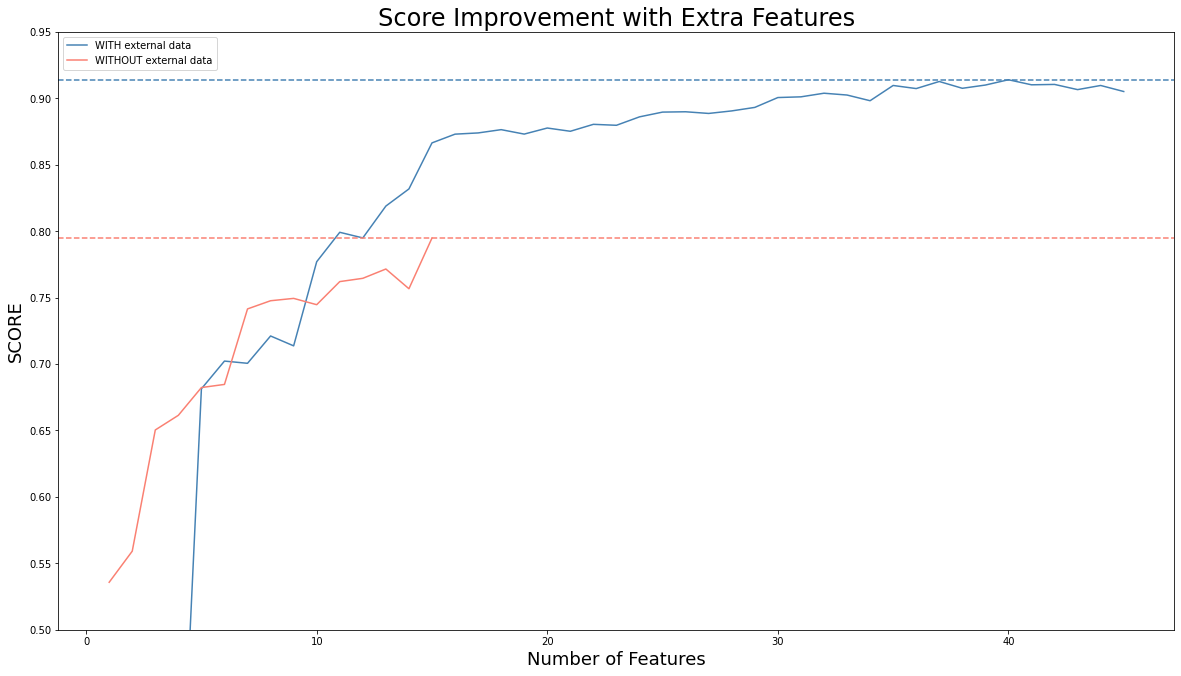

In [131]:
plotScoreImprovement(res_df_with[res_df_with.iteration == 1], res_df[res_df.iteration == 1], 'num_vars', 'score', 'Score Improvement with Extra Features')